## Part 3 - K-Nearest Neighbors Classifier

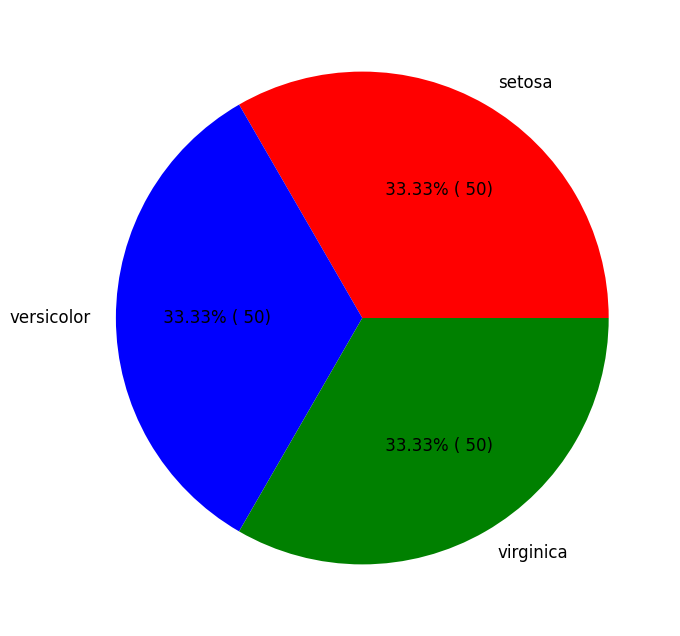

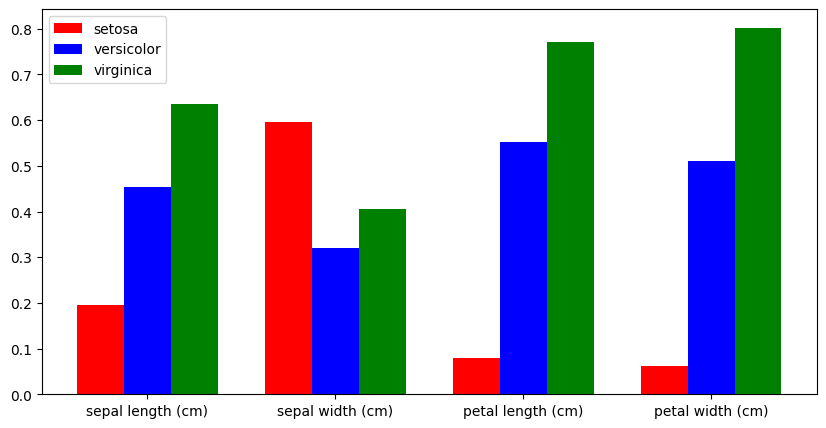

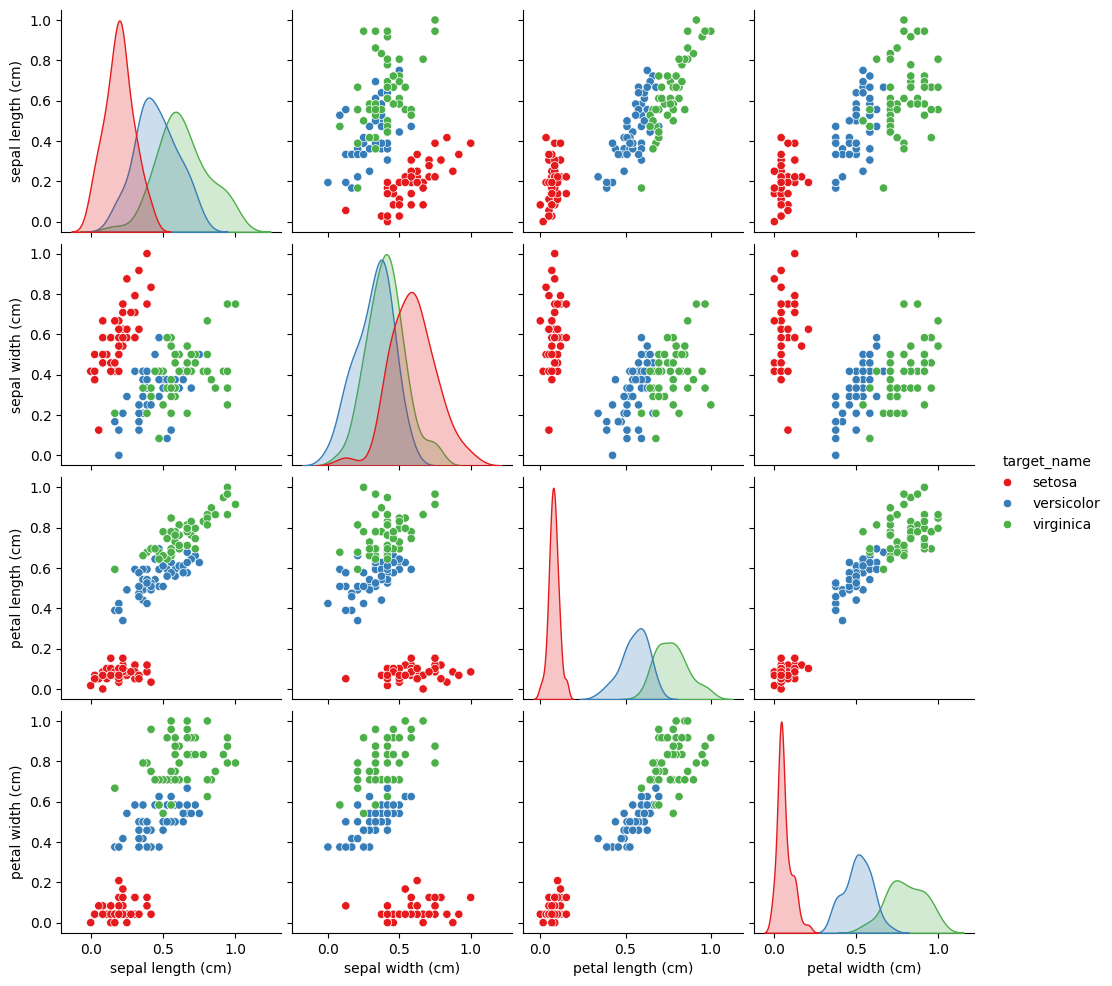

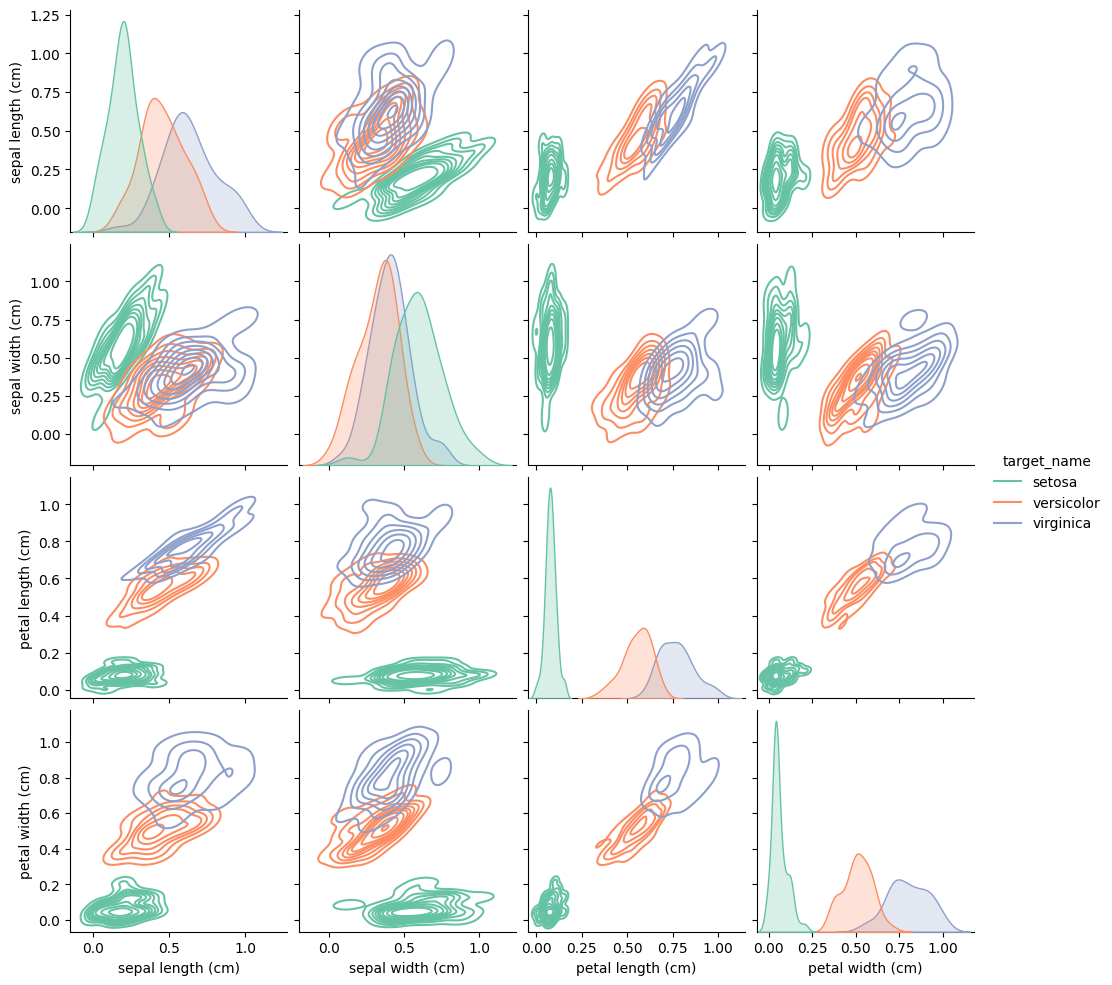

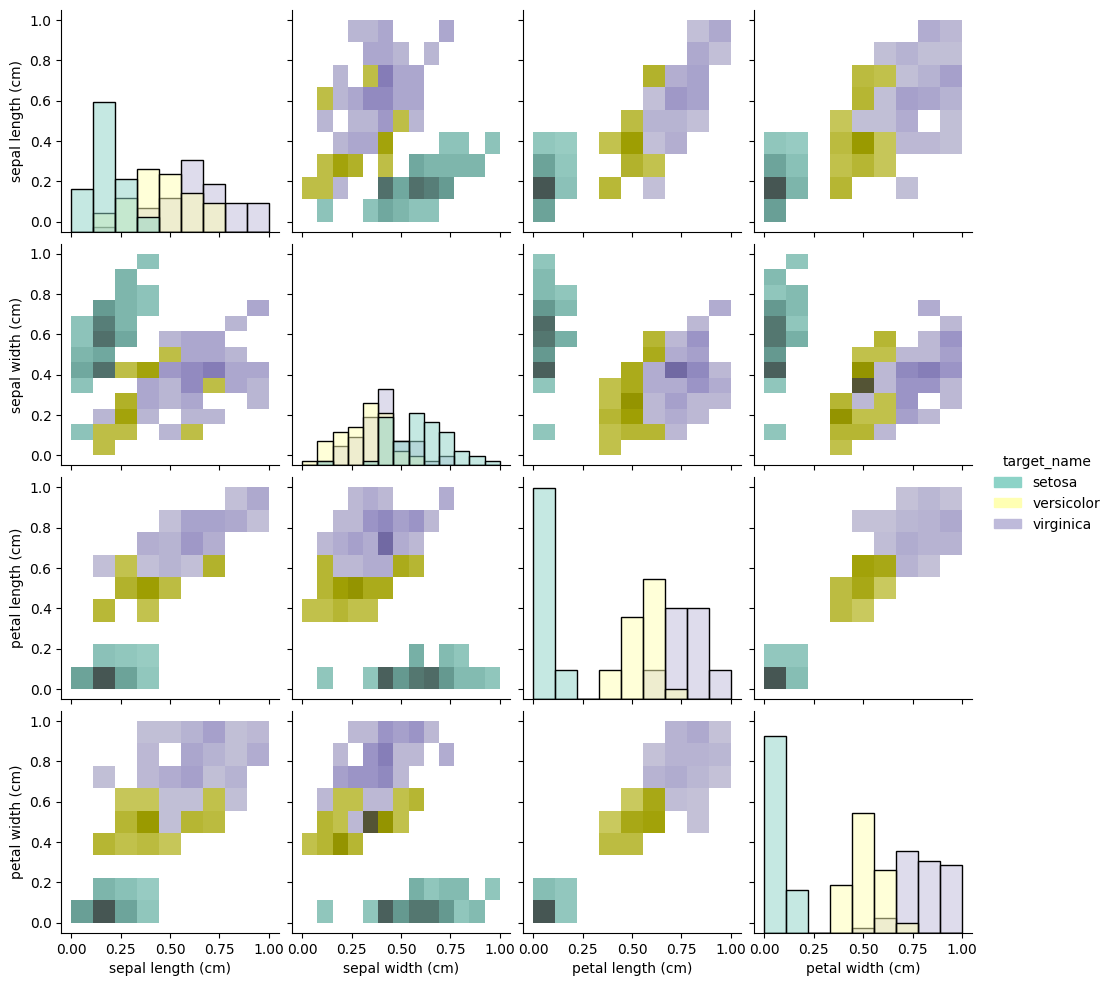

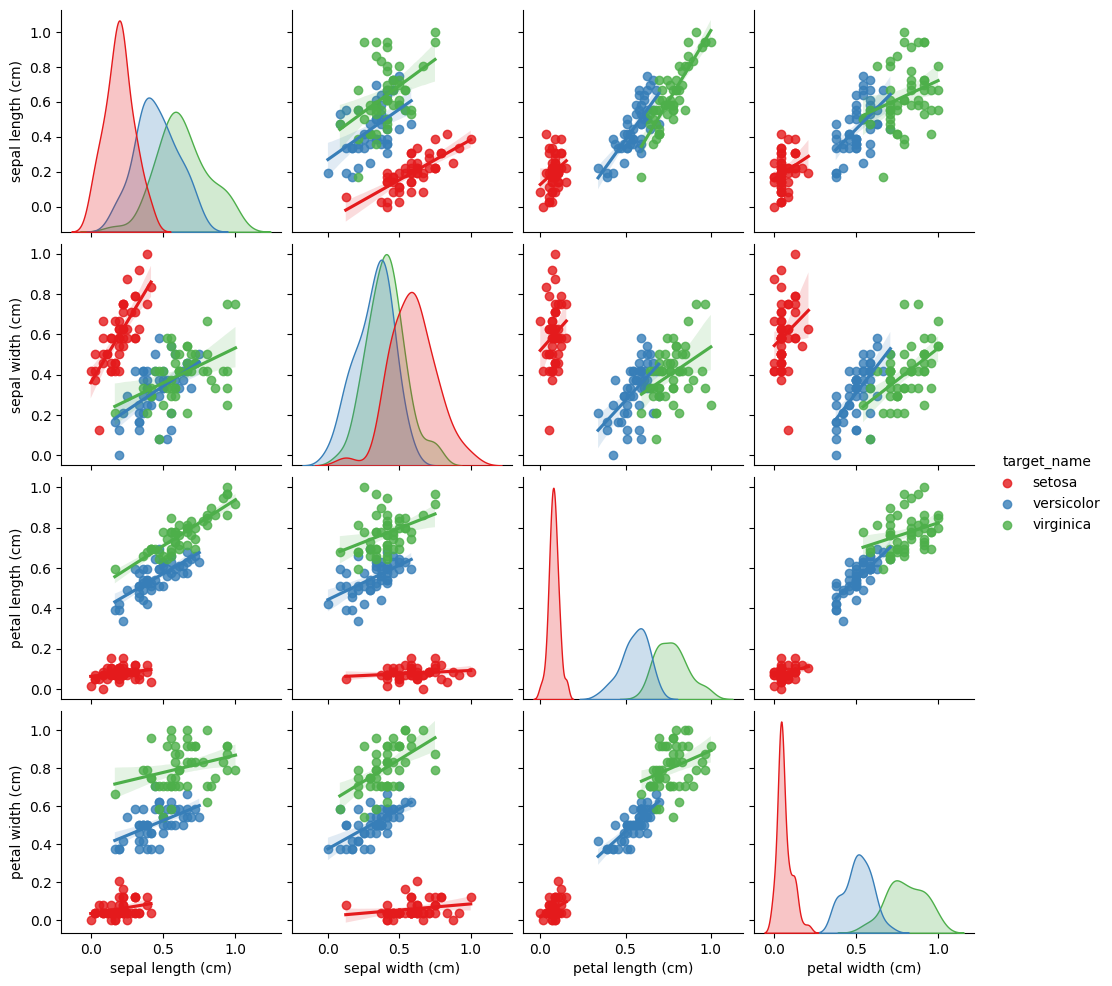

(120, 4) (30, 4) (120,) (30,)
{'splitter': 'random', 'min_samples_split': np.int64(4), 'max_features': 'log2', 'max_depth': np.int32(85), 'criterion': 'entropy'} 

Train accuracy: 0.9666666666666668
Test accuracy: 0.9666666666666667
{'criterion': 'entropy', 'max_depth': np.int64(82), 'max_features': 'log2', 'min_samples_split': np.int64(4), 'splitter': 'random'} 

Train accuracy: 0.9666666666666668
Test accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



/Users/fosse/Desktop/python/classifications/classifications-venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fosse/Desktop/python/classifications/classifications-venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/fosse/Desktop/python/classifications/classifications-venv/lib/python3.13/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._v

In [7]:
# Run Part 2 to import all variables
%run "./iris-flower2-decision-tree-classifier.ipynb"

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train).score(X_test, y_test)

0.9666666666666667

In [10]:
params = {"n_neighbors": np.arange(1, 15),
          "weights": ["uniform", "distance"],
          "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
          "metric": ["minkowski", "euclidean", "manhattan", "chebyshev"], # Distance functions (i.e. different ways to evaluate distances between points)
          "leaf_size": np.linspace(10, 150, 15).astype(int)}

rand_search = RandomizedSearchCV(KNeighborsClassifier(), params, scoring = "accuracy",
                                 random_state = 1, cv = 5)
rand_search.fit(X_train, y_train)

rand_params = rand_search.best_params_
print(rand_params, "\n")
print("Train accuracy:", rand_search.best_score_)
preds = rand_search.predict(X_test)
print("Test accuracy:", accuracy_score(preds, y_test))

{'weights': 'uniform', 'n_neighbors': np.int64(7), 'metric': 'euclidean', 'leaf_size': np.int64(20), 'algorithm': 'brute'} 

Train accuracy: 0.9583333333333334
Test accuracy: 1.0


In [11]:
n_neighbors = np.arange(rand_params["n_neighbors"] - 3, rand_params["n_neighbors"] + 3)

leaf_size = np.arange(rand_params["leaf_size"] - 3, rand_params["leaf_size"] + 3)

params = {"n_neighbors": n_neighbors,
          "weights": [rand_params["weights"]],
          "algorithm": [rand_params["algorithm"]],
          "metric": [rand_params["metric"]],
          "leaf_size": leaf_size}

grid_search = GridSearchCV(KNeighborsClassifier(), params, scoring = "accuracy", cv = 5)
grid_search.fit(X_train, y_train)

grid_params = grid_search.best_params_
print(grid_params, "\n")
print("Train accuracy:", grid_search.best_score_)
preds = grid_search.predict(X_test)
print("Test accuracy:", accuracy_score(preds, y_test))

{'algorithm': 'brute', 'leaf_size': np.int64(17), 'metric': 'euclidean', 'n_neighbors': np.int64(7), 'weights': 'uniform'} 

Train accuracy: 0.9583333333333334
Test accuracy: 1.0


In [12]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

